# Machine Learning for Genre Classification
## Part II: Model Building & Evaluation
### Tom Earnest

_This notebook continues from "Part I", where we built a dataset for machine learning from a collection of audio files.  This notebook will cover the ML training and evaluation._

Now that we have the `songs.csv` file, containing features for all of our songs and their genre labels, we can work from only this spreadsheet (and not with any of the larger `.wav` files.

## Loading the Dataset

We will start by importing some of the needed libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pprint

And setting the working directory with our dataset:

In [2]:
cd "D:/Songlearning/"

D:\Songlearning


Loading the dataset.  The `songs.csv` file was built with an empty first column; we will drop it and load into a `DataFrame`.

In [3]:
songs = pd.read_csv('songs.csv')
songs = songs.drop('Unnamed: 0', axis = 1)
songs

,song,genre,duration,tempo,tempo_changes,tempo_confidence,sub_strength,bass_strength,lomid_strength,mid_strength,...,spectral_centroid,spectral_bandwidth,band 0_contrast,band 1_contrast,band 2_contrast,band 3_contrast,mean_flatness,peak_flatness,rolloff(0.5),tuning
0,2-18 Adagio In G Minor.wav,classical,403.560000,123.046875,0.840046,0.437745,-69.937752,-46.466240,-46.362034,-59.902027,...,1229.354154,1369.216170,28.187134,21.646552,25.890673,48.481068,0.011589,0.010380,749.916100,0.14
1,"1-22 Symphony No. 94 In G Major, Hob.wav",classical,183.805125,112.347147,0.631632,0.449975,-56.923286,-45.887459,-45.843201,-55.359638,...,1636.966577,1768.998819,23.412409,18.339226,22.748773,44.080071,0.006729,0.058556,1026.586482,0.43
2,2-47 3 Gymnopédies_ Gymnopedie No.3.wav,classical,136.942222,95.703125,1.169888,0.175144,-48.284836,-35.853439,-40.226242,-65.640259,...,458.532285,813.800946,26.596392,18.781046,24.571072,42.218725,0.011041,0.000270,288.394503,0.04
3,1-48 Symphony No. 5 In C Sharp Minor.wav,classical,724.212154,123.046875,0.670087,0.515229,-41.229824,-48.095158,-49.479107,-60.458160,...,1456.766831,1750.424010,17.313058,19.639970,24.059596,42.004957,0.002411,0.026788,777.938569,0.05
4,2-21 Symphonies de Fanfares_ Rondeau.wav,classical,110.666304,161.499023,0.524439,0.678414,-54.417900,-39.528473,-38.383759,-42.102161,...,2234.155823,2030.182088,20.525741,17.798760,19.997354,44.733609,0.012057,0.081753,1601.077445,0.06
5,2-28 Symphonie Espagnole In D Minor.wav,classical,484.124444,112.347147,0.839329,0.331271,-64.188072,-47.335423,-43.888500,-52.731331,...,1746.411733,1896.470036,23.537399,17.524957,21.115912,43.315789,0.003571,0.067342,1044.307680,0.14
6,2-34 Sylvia_ Procession of Bacchus.wav,classical,355.770340,117.453835,0.672236,0.379846,-48.333992,-37.657970,-38.863781,-46.931847,...,1823.841786,1894.797800,21.101600,15.079932,19.414412,42.885857,0.011397,0.155777,1155.288250,0.16
7,2-46 The Sorcerer's Apprentice.wav,classical,692.511927,117.453835,0.694049,0.240872,-61.627472,-49.717087,-47.314827,-56.784119,...,2045.870499,2154.334101,20.436364,15.248713,20.102135,40.411367,0.010696,0.138994,1247.654366,0.07
8,"1-12 Solomon, HWV 67 (arr. for Organ.wav",classical,193.480272,117.453835,0.528021,0.557422,-40.538418,-37.200577,-38.816086,-50.267883,...,1244.083831,1435.215733,18.858562,17.460832,24.786223,47.497383,0.002450,0.005327,693.905080,-0.08
9,"2-02 Slavonic Dances, Op. 46, No.8 I.wav",classical,222.586485,107.666016,0.761448,0.424533,-43.685604,-35.256481,-35.979465,-46.798553,...,1586.013894,1838.074389,18.816234,14.038465,18.216167,43.273456,0.013188,0.172661,916.579535,0.26


## Preprocessing

Let's start by creating a new array with just the features; this will allow us to do some mathematical operations easily.

In [4]:
songs_data = songs.loc[:,'duration':]
songs_data.head(20)

,duration,tempo,tempo_changes,tempo_confidence,sub_strength,bass_strength,lomid_strength,mid_strength,himid_strength,pres_strength,...,spectral_centroid,spectral_bandwidth,band 0_contrast,band 1_contrast,band 2_contrast,band 3_contrast,mean_flatness,peak_flatness,rolloff(0.5),tuning
0,403.560000,123.046875,0.840046,0.437745,-69.937752,-46.466240,-46.362034,-59.902027,-66.952728,-73.093315,...,1229.354154,1369.216170,28.187134,21.646552,25.890673,48.481068,0.011589,0.010380,749.916100,0.14
1,183.805125,112.347147,0.631632,0.449975,-56.923286,-45.887459,-45.843201,-55.359638,-61.403843,-68.163788,...,1636.966577,1768.998819,23.412409,18.339226,22.748773,44.080071,0.006729,0.058556,1026.586482,0.43
2,136.942222,95.703125,1.169888,0.175144,-48.284836,-35.853439,-40.226242,-65.640259,-78.790970,-79.911346,...,458.532285,813.800946,26.596392,18.781046,24.571072,42.218725,0.011041,0.000270,288.394503,0.04
3,724.212154,123.046875,0.670087,0.515229,-41.229824,-48.095158,-49.479107,-60.458160,-65.086716,-72.121010,...,1456.766831,1750.424010,17.313058,19.639970,24.059596,42.004957,0.002411,0.026788,777.938569,0.05
4,110.666304,161.499023,0.524439,0.678414,-54.417900,-39.528473,-38.383759,-42.102161,-50.612453,-57.903042,...,2234.155823,2030.182088,20.525741,17.798760,19.997354,44.733609,0.012057,0.081753,1601.077445,0.06
5,484.124444,112.347147,0.839329,0.331271,-64.188072,-47.335423,-43.888500,-52.731331,-62.274769,-70.266975,...,1746.411733,1896.470036,23.537399,17.524957,21.115912,43.315789,0.003571,0.067342,1044.307680,0.14
6,355.770340,117.453835,0.672236,0.379846,-48.333992,-37.657970,-38.863781,-46.931847,-53.520496,-61.522915,...,1823.841786,1894.797800,21.101600,15.079932,19.414412,42.885857,0.011397,0.155777,1155.288250,0.16
7,692.511927,117.453835,0.694049,0.240872,-61.627472,-49.717087,-47.314827,-56.784119,-63.089676,-67.465179,...,2045.870499,2154.334101,20.436364,15.248713,20.102135,40.411367,0.010696,0.138994,1247.654366,0.07
8,193.480272,117.453835,0.528021,0.557422,-40.538418,-37.200577,-38.816086,-50.267883,-61.048454,-70.647842,...,1244.083831,1435.215733,18.858562,17.460832,24.786223,47.497383,0.002450,0.005327,693.905080,-0.08
9,222.586485,107.666016,0.761448,0.424533,-43.685604,-35.256481,-35.979465,-46.798553,-57.220909,-64.751419,...,1586.013894,1838.074389,18.816234,14.038465,18.216167,43.273456,0.013188,0.172661,916.579535,0.26


The main pre-processing I will is normalization.  My initial tooling around with the dataset indicated that **normalization significantly improved the prediction accuracy**.  We can work with the normalized data in `songs_data_norm` from here on out.  Printing the column means and standard deviations verifies the features are normalized (i.e. mean = 0, std = 1).

In [5]:
songs_data_norm = (songs_data-songs_data.mean())/songs_data.std()

#verifying the normalization; we see means of ~0 and standard deviations of ~1
print(songs_data_norm.mean())
print(songs_data_norm.std())

duration              2.881029e-16
tempo                 8.582024e-16
tempo_changes         1.258715e-15
tempo_confidence      7.521761e-16
sub_strength         -2.015055e-16
bass_strength         2.234324e-16
lomid_strength       -7.649437e-16
mid_strength          1.937339e-16
himid_strength        3.108624e-17
pres_strength        -1.942890e-17
brill_strength       -6.628031e-16
mean_RMS              3.004541e-17
std_RMS               4.135581e-17
spectral_centroid    -1.150746e-15
spectral_bandwidth    9.842127e-16
band 0_contrast       3.288758e-15
band 1_contrast      -7.971401e-16
band 2_contrast      -2.590705e-15
band 3_contrast       1.187384e-15
mean_flatness        -1.681988e-16
peak_flatness         5.329071e-17
rolloff(0.5)          1.343370e-15
tuning               -3.355649e-16
dtype: float64
duration              1.0
tempo                 1.0
tempo_changes         1.0
tempo_confidence      1.0
sub_strength          1.0
bass_strength         1.0
lomid_strength        1.

## Exploring the Features

By doing some plotting, we can explore the data set and make some predictions about which features will be useful for classification.  First, I will plot the distributions of each variable, while segmenting the plots by the genre labels:

C:\Users\earne\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0.9, 'Histogram Matrix of Features by Genre')

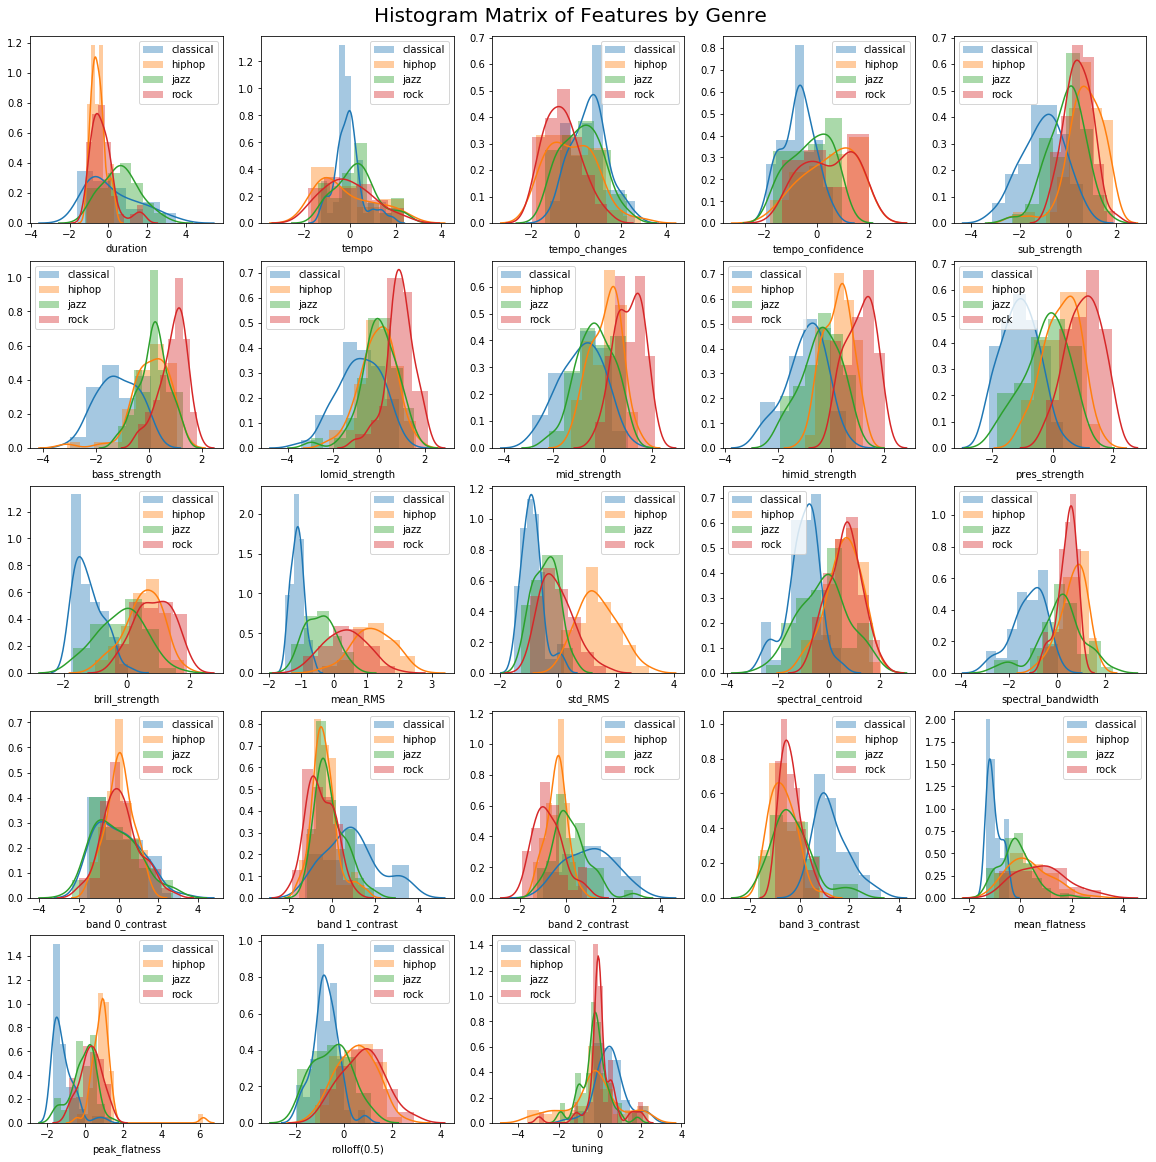

In [6]:
cols = songs_data_norm.columns

plt.figure(figsize=(20,20))
#loops over each feature in the normalized dataframe
for n in range(len(cols)):
    #on a 5x5 subplot, iteratively choses which plot to start drawing
    plt.subplot(5,5,n+1)
    #loops over each genre in each feature, and plots a curve for each genre
    for i in pd.unique(songs['genre']):
        sns.distplot(songs_data_norm[cols[n]][songs['genre'] == i], label = i)
        plt.legend()
        
plt.suptitle('Histogram Matrix of Features by Genre', fontsize = 20, y = .9)

We can already start to see some features may be more useful than others.  For instance, in `std_RMS`, the distribution for hiphop songs is right-shifted.  High values in this features may provide useful information to the ML algorithm in separating hiphop from other genres.

Conversely, `tuning` exhibits nearly complete overlap, and may provide less information for discrimination.

We can also look at the correlation of all the features.  If a pair (or group) of features are correlated, it might be good to remove some of them, as they contain similar information.  One way of exploring this is to plot a correlation matrix, which I do below.  We take the absolute value of the correlations, as strong negative correlations between two variables will be as redundant as positive ones.  In the plot, X's are used to mark correlations greater than 0.8 (an arbitrary choice).  

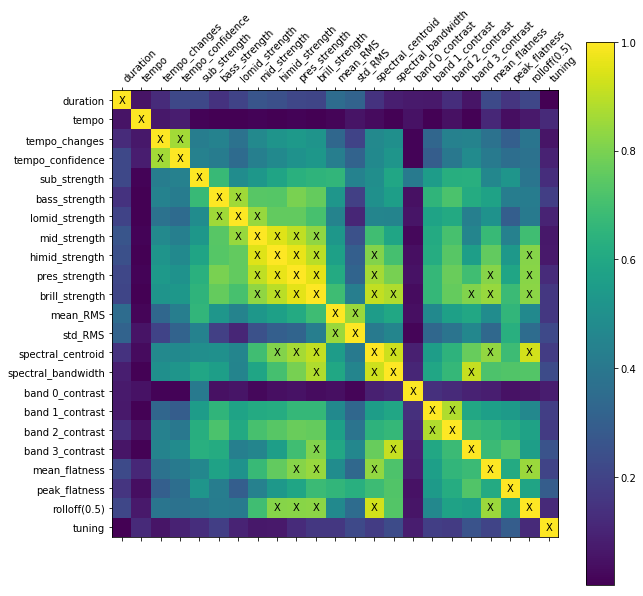

In [7]:
#easily makes a correlation matrix df; we take the absolute value
songs_corr = songs_data_norm.corr()
songs_corr_abs = np.abs(songs_corr)

fig, ax = plt.subplots(figsize=(10,10))
im = ax.matshow(songs_corr_abs)
ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
ax.set_xticklabels(cols, ha='left')
ax.set_yticklabels(cols)
ax.tick_params('x', labelrotation = 45)
ax.figure.colorbar(im)

for i in range(len(cols)):
    for j in range(len(cols)):
        if songs_corr_abs.loc[cols[j],cols[i]] >0.8:
            text = ax.text(j, i,"X", ha="center", va="center", color="black")

We can see that several features are correlated with each other, and that it might benefit us to remove some of these.  I have included some code below which allows one to see each feature's correlations and how strong they are, as well as the number of correlations with other variables.  In the end, I used `sklearn` to do feature selection for me, but manually removing some of these variables also appeared to improve performance.

In [8]:
corrdict = {}
for i in range(len(songs_corr.columns)):
    tuplist = []
    for j in range(len(songs_corr.index)):
        if songs_corr_abs.iloc[i,j] > 0.8 and i != j:
            tuplist.append((songs_corr.index[j], songs_corr.iloc[i,j]))
            corrdict[songs_corr.columns[i]] = tuplist        
        
numcorr = {}
for i in corrdict:
    numcorr[i] = len(corrdict[i])
    
print('Correlates of each feature (> 0.8):\n')
pprint.pprint(corrdict)
print('\nNumber of correlates of each feature (> 0.8):\n')
pprint.pprint(numcorr)

Correlates of each feature (> 0.8):

{'band 1_contrast': [('band 2_contrast', 0.8798517029625254)],
 'band 2_contrast': [('band 1_contrast', 0.8798517029625254)],
 'band 3_contrast': [('brill_strength', -0.8096487668623021),
                     ('spectral_bandwidth', -0.912057350468911)],
 'bass_strength': [('lomid_strength', 0.8590674086611063)],
 'brill_strength': [('mid_strength', 0.834718623009624),
                    ('himid_strength', 0.8978415615008833),
                    ('pres_strength', 0.9586365227169235),
                    ('spectral_centroid', 0.9083561309406551),
                    ('spectral_bandwidth', 0.8815891782769385),
                    ('band 3_contrast', -0.8096487668623021),
                    ('mean_flatness', 0.8442569952904919),
                    ('rolloff(0.5)', 0.8273360215136213)],
 'himid_strength': [('mid_strength', 0.9530094059419538),
                    ('pres_strength', 0.9657425753178487),
                    ('brill_strength', 0.89784156

Here's some initial plans I had for manually selecting features (again, this was not actually used in my model selection):

- `tempo_changes` and `tempo_condidence` are negatively correlated.  `tempo_condidence` appears to offer slightly more separation, so we will include that and drop `tempo_changes`.

- `bass_strength`, `lomid_strength`, and `mid_strength` are all correlated.  `bass strength` will be kept as it has no correlations to other variables.

- `himid_strength`, `pres_strength`, and `brill_strength` are all correlated, to numerous variables.  `pres_strength` will be included as its histogram shows the most segragation between groups.

- `mean_RMS` and `std_RMS` are both correlated, but their histograms show different segregations for the genres (`mean_RMS` has a nice peak for jazz, while `std_RMS` has a clear separation for hiphop), so I will try to keep both.

- `spectral_centroid` and `spectral_bandwidth` are correlated; the former will be dropped for its correlations with 5 other variables

- `band 1_contrast` and `band 2_contrast` are correlated; the former will be dropped because in the histogram the distributions of jazz, rock, and hiphop are nearly identical.

## Training the Model

To make things more legible, we will set `features` and `labels` to be the data for each song and their associated genre labels, respectively.

In [9]:
labels = songs['genre']
features = songs_data_norm

print(labels.shape)
print(features.shape)

(200,)
(200, 23)


Onto the ML: we need to use some sort of classification algorithm; _a priori_, I have no inclination to prefer one model.  Instead, I will use `GridSearchCV` to select the best of a few candidate models.  Additionally, the feature exploration above indicates that it might be good to remove some features.  We will also include some feature trimming in our model search.

Here are the packages we will use in this process:

- `warnings` is used only to block an annoying repetitive warning that popped up during model selection
- `Pipeline` allows us to tell `sklearn` to test multiple estimators and feature selectors in sequence.  It also allows us to input hyperparameters to test for each estimator/selector, which `GridSearchCV` can use to iterate over and find the "best" algorithm.
- `SelectKBest` will be used to choose the best features.  Assuming some features should be removed, I decided to use 5, 10, and 15 as the possible number of features to include.
- The classifiers to test (again, mostly based arbitrarily off of what we covered in class) will be `KNeighborsClassifier`, `SVC` (Support Vector Classifier), and `DecisionTreeClassifier`.
- Finally, we can use nested cross validation to (1) perform model selection and then (2) estimate generalizability.  We will import a few functions from `sklearn.model_selection` to accomplish these tasks.

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectKBest

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import (StratifiedKFold, cross_val_score
                                     , GridSearchCV, cross_val_predict)

The cell below contains the actual model training.  First, we set up a `Pipeline`, which runs feature pruning and hyperparameter optimization for each estimator.  The model, `clf`, uses `GridSearchCV` to iterate over these models and try all the candidate hyperparameters.  Finally, we can use `cross_val_score` to provide the estimations of model accuracy in the outer cross validation loop, and `cross_val_predict` to return the predictions for each song when they were used in the test set.

In [11]:
%%time

# https://stackoverflow.com/questions/45150652/putting-together-sklearn-pipelinenested-cross-validation-for-knn-regression
#https://stackoverflow.com/questions/51629153/more-than-one-estimator-in-gridsearchcvsklearn
pipe = Pipeline(steps=[('select', SelectKBest()), ('estimator', SVC())])
params_grid = [{'select': [SelectKBest()],
                'select__k':[5,10,15],
                'estimator':[SVC()], 
                'estimator__C': [1, 10, 100, 1000],
                'estimator__gamma': [0.001, 0.0001]}, 
               {'select': [SelectKBest()],
                'select__k':[5,10,15],
                'estimator': [DecisionTreeClassifier()],
                'estimator__max_depth': [1,2,3,4,5],
                'estimator__max_features': [None, "auto", "sqrt", "log2"]},
               {'select': [SelectKBest()],
                'select__k':[5,10,15],
                'estimator': [KNeighborsClassifier()],
                'estimator__n_neighbors': [2,3,4,5,6,7,8,9,10],}]
               # {'estimator':[Any_other_estimator_you_want],
               #  'estimator__valid_param_of_your_estimator':[valid_values]
    
            
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

clf = GridSearchCV(pipe, params_grid, cv = inner_cv)
models = clf.fit(features, labels)
cv_score = cross_val_score(models, features, labels, cv = outer_cv, scoring='accuracy')
predicts = cross_val_predict(models, features, labels, cv = outer_cv)

Wall time: 26.2 s


In [12]:
print("Best Estimator:")
print(models.best_estimator_)

Best Estimator:
Pipeline(memory=None,
     steps=[('select', SelectKBest(k=10, score_func=<function f_classif at 0x000001C795033730>)), ('estimator', SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


The best estimator was a SVC with `C` = 1000 and `gamma` = 0.001.  Additionally, 10 of the 23 features were used, thanks to `SelectKBest`.

## Evaluating Performance

We can start to look at the performance by seeing the cross validation scores:

In [13]:
print('\nAccuracy for the outer CV:\n' + str(cv_score) + "\n\nMean cv_score:\n" + str(cv_score.mean()))


Accuracy for the outer CV:
[0.8   0.875 0.95  0.725 0.925]

Mean cv_score:
0.8550000000000001


I think this score is not too bad!  There was a lot of overlap in the feature distributions for each genre, but the model can still assign genres far better than chance (25%).

We can also see what features were the most useful for classification, using the `.scores_` attribute of the `SelectKBest` used in the best model.  

_Oddly, this seems to report scores for all 23 features, which didn't seem to match other code I saw online.  However, using the_ `.support_vectors_` _attribute of the support vector classifier for the winning model seems to confirm that only 10 features were used.  Printing the shape of the support vector array shows 10 columns, corresponding to each feature._

In [14]:
pd.DataFrame(models.best_estimator_.named_steps['estimator'].support_vectors_).shape

(67, 10)

In [15]:
#returns the feature "scores", aka the value of each feature in the eyes of SelectKBest
score_array = models.best_estimator_.named_steps['select'].scores_

#compiles the scores into a dictionary, where keys are the feature names and values are the scores
score_dict = {}
for i in range(len(cols)):
    score_dict[cols[i]] = score_array[i]
    
print('Scores of each feature:')
pprint.pprint(score_dict)

#sorting the printed reslts so that the highest features are first
print('\nSorted by score:')
# https://www.saltycrane.com/blog/2007/09/how-to-sort-python-dictionary-by-keys/
for key, value in sorted(score_dict.items(), reverse=True, key=lambda item: item[1]):
    print("%s: %s" % (key, value))

Scores of each feature:
{'band 0_contrast': 0.5096357617330562,
 'band 1_contrast': 30.682794923555704,
 'band 2_contrast': 52.836160611318014,
 'band 3_contrast': 91.19214241796763,
 'bass_strength': 86.67880546178472,
 'brill_strength': 114.90309182290171,
 'duration': 16.6224127234852,
 'himid_strength': 92.19508070014922,
 'lomid_strength': 41.17853790305035,
 'mean_RMS': 192.26825676311316,
 'mean_flatness': 59.001210049604275,
 'mid_strength': 65.2470717086147,
 'peak_flatness': 82.7403227404596,
 'pres_strength': 102.54380801079826,
 'rolloff(0.5)': 49.143737202642974,
 'spectral_bandwidth': 70.78344969795172,
 'spectral_centroid': 54.67203893781982,
 'std_RMS': 170.24131896563824,
 'sub_strength': 50.625767207678216,
 'tempo': 1.992386930079377,
 'tempo_changes': 17.27485126510948,
 'tempo_confidence': 22.79172075195869,
 'tuning': 8.322294676824763}

Sorted by score:
mean_RMS: 192.26825676311316
std_RMS: 170.24131896563824
brill_strength: 114.90309182290171
pres_strength: 102.

The 10 most important features used were `mean_RMS`, `std_RMS`, `brill_strength`, `pres_strength`, `himid_strength`, `band 3_contrast`, `bass_strength`, `peak_flatness`, and `spectral_bandwidth`.  Interestingly, some of these features are correlated with each other!  Maybe it will still be good to remove some of these features, for the sake of improving the generalizability/stability of the model, but I am not sure.

We can also plot the model's performance using a confusion matrix:

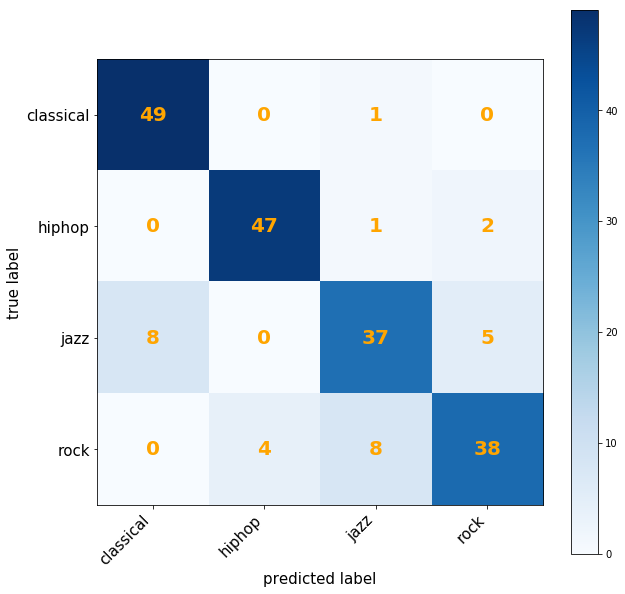

In [16]:
from sklearn.metrics import confusion_matrix

#makes the confusion matrix
labelnames = pd.unique(labels)
confmat = confusion_matrix(labels, predicts, pd.unique(labels))

#plots it
fig, ax = plt.subplots(figsize=(10,10))
im = ax.matshow(confmat, cmap ='Blues')
ax.set_xticks(np.arange(len(labelnames)))
ax.set_yticks(np.arange(len(labelnames)))
ax.set_xticklabels(labelnames, ha='right', fontsize=15)
plt.gca().xaxis.tick_bottom()
ax.set_yticklabels(labelnames, fontsize=15)
ax.tick_params('x', labelrotation = 45)
ax.figure.colorbar(im)
ax.set_xlabel("predicted label", fontsize = 15)
ax.set_ylabel("true label", fontsize = 15)

#adds a value into each box of the matrix
for i in range(len(labelnames)):
    for j in range(len(labelnames)):
        text = ax.text(i, j, confmat[j,i], ha="center", va="center", color="orange", fontsize = 20, fontweight = "bold")

The model does best at classifying classical and hiphop songs; it rarely mixes these up as another genre.  Jazz songs are sometimes confused as classical or rock songs, while rock songs are confused as hiphop or jazz.

We can also use dimensionality reduction to plot a representation of the songs and their similarities/differences.  I will use both `TSNE` and `UMAP` here (thanks to the class for suggesting the latter!).  It is important to note, however, that this is not how our SVC algorithm "sees" the data, so these plots may not actually reflect how the classification is done.

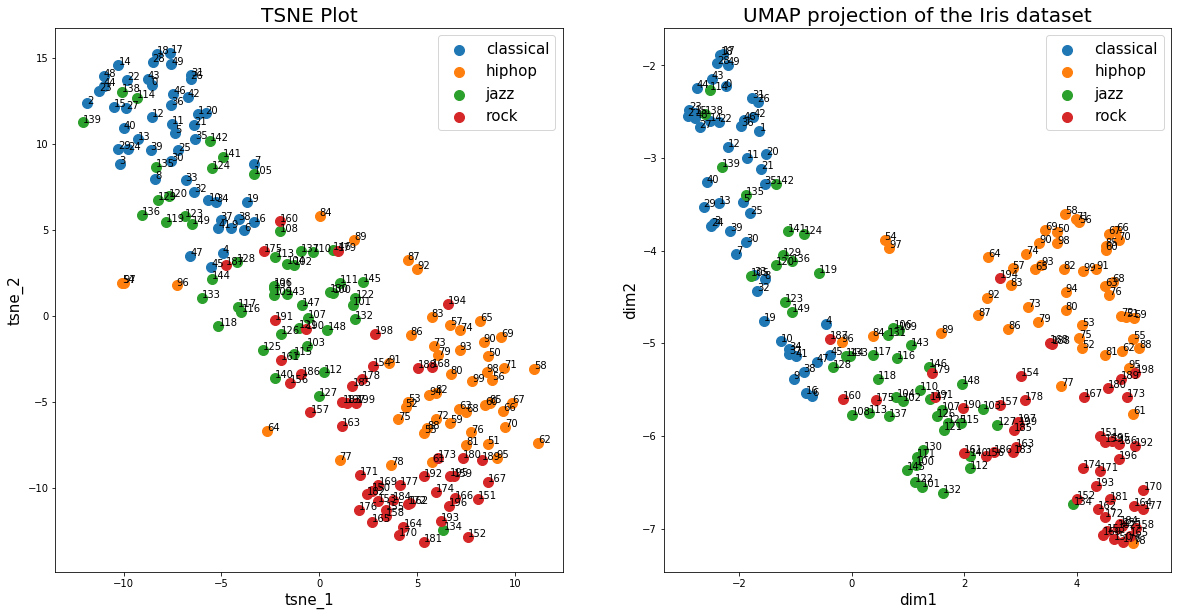

In [17]:
from sklearn.manifold import TSNE
import umap

#the tsne data
tsne = pd.DataFrame(TSNE(random_state=10).fit_transform(X = features))

#the umap data
reducer = umap.UMAP(random_state=9)
embedding = pd.DataFrame(reducer.fit_transform(features))

#the random states used above were selected just to find plots that orient the clusters approximately the same way

#makes a plot with two subplots on the same row
fig, ax = plt.subplots(1,2, figsize = (20,10))

#the tsne plot; adds one group of points iteratively for each genre
#i.e., finds the points in tsne that correspond to each genre, and plots them as a scatter plot
for i in pd.unique(labels):
    ax[0].scatter(tsne[songs['genre'] == i][0], tsne[songs['genre'] == i][1], label = i, s = 100)

#adds the index of each point to the plot
for i in range(len(tsne)):
    ax[0].text(tsne[0][i], tsne[1][i], str(i), fontsize = 10)

ax[0].set_title("TSNE Plot", fontsize = 20)
ax[0].set_xlabel('tsne_1', fontsize = 15)
ax[0].set_ylabel('tsne_2', fontsize = 15)
ax[0].legend(fontsize = 15)

#same code is reused for the UMAP plot
for i in pd.unique(labels):
    ax[1].scatter(embedding[songs['genre'] == i][0], embedding[songs['genre'] == i][1], label = i, s = 100)
    
for i in range(len(embedding)):
    ax[1].text(embedding[0][i], embedding[1][i], str(i), fontsize = 10)
ax[1].set_title('UMAP Plot', fontsize=20)
ax[1].set_xlabel('dim1', fontsize = 15)
ax[1].set_ylabel('dim2', fontsize = 15)
ax[1].legend(fontsize = 15)

I think these plots are interesting to consider in tandem with the confusion matrix.  Hiphop and classical are very far apart from each other, and are also relatively separated from other genres.  A lot of overlap can be seen, on the other hand, between rock and jazz, or jazz and classical.  

Additionally, it is cool to speculate that these plots represent a spectrum of song attributes, or some "genre space".  Both rock and hiphop represent the most modern songs here, and likely have the most heavily produced recordings.  The two genres are also similar in their emphasis on strong beats and rhythms (compared to jazz and classical).  Jazz and classical music are more similar in their emphasis on live instruments and less manipulated recordings.  Jazz creates a sort of bridge in between classical music and the modern rock and rap songs.

Below, `returnsong()` allows you to explore which index relates to which song name.  There is also a list of song names.

In [18]:
def returnsong(x):
    return songs['song'][x]

returnsong(134)

'03 Four By Five.wav'

In [19]:
for i in range(len(songs['song'])):
    print(str(i), ' ',songs['song'][i])

0   2-18 Adagio In G Minor.wav
1   1-22 Symphony No. 94 In G Major, Hob.wav
2   2-47 3 Gymnopédies_ Gymnopedie No.3.wav
3   1-48 Symphony No. 5 In C Sharp Minor.wav
4   2-21 Symphonies de Fanfares_ Rondeau.wav
5   2-28 Symphonie Espagnole In D Minor.wav
6   2-34 Sylvia_ Procession of Bacchus.wav
7   2-46 The Sorcerer's Apprentice.wav
8   1-12 Solomon, HWV 67 (arr. for Organ.wav
9   2-02 Slavonic Dances, Op. 46, No.8 I.wav
10   2-41 The Snow Maiden (_Snegurochka_).wav
11   1-49 Romeo and Juliet, Suite No. 2 f.wav
12   1-50 Rhapsody On a Theme By Paganini.wav
13   1-42 Prelude a L'apres-Midi D'un Fau.wav
14   2-43 Requiem_ Pie Jesu.wav
15   1-30 Piano Sonata No. 2 In B Flat Mi.wav
16   2-37 Pictures At an Exhibition (Arr..wav
17   2-16 Music for the Funeral of Queen.wav
18   2-17 Oboe Concerto In D Minor_ II. A.wav
19   1-35 Marche Slave In B Flat Major, O.wav
20   2-07 Magnificat.wav
21   2-39 Lyric Suite, Op. 54_ III. Nottu.wav
22   2-49 Liebesfreud.wav
23   1-31 Kinderszenen (Scenes f

## The Final Model!

Now that we are out of new data, we can train the model on the entire set.

In [20]:
final_model = Pipeline(steps=[('select', SelectKBest(k=10)), ('estimator', SVC(C=1000, gamma=0.001))])

fnl = final_model.fit(features, labels)
fnl_predicts = fnl.predict(features)

One last caveat I'd like to note: the songs used here are ones that I owned, and largely reflect my own musical tastes.  Because of this, I would still expect the model to have issues with generalization.  It has not been presented with representative samples of each genre.

But, I will have to try to add more songs to see if this is the case!